<a href="https://colab.research.google.com/github/mehraj-alom/Deep_learrning/blob/main/Copy_of_Handling_imbalanced_data_in_machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
mehrajalomtapadar_churn_dataset_path = kagglehub.dataset_download('mehrajalomtapadar/churn-dataset')

print('Data source import complete.')


Data source import complete.


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/churn-dataset/Churn_Modelling.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("/content/Churn_Modelling.csv")
df.head(3)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


In [ ]:
def Basic_Info(df):
    print("Shape: ")
    print(df.shape)
    print("Random Sample :")
    print(df.sample(6))
    print("Description :")
    print(df.describe())
    print("INFO :")
    print(df.info())
    print("Check For null values:")
    print(df.isnull().sum())
Basic_Info(df)

Shape: 
(10000, 14)
Random Sample :
      RowNumber  CustomerId     Surname  CreditScore Geography  Gender  Age  \
3793       3794    15584037     Denisov          727   Germany    Male   58   
4893       4894    15656263        Teng          764     Spain    Male   29   
4215       4216    15574213      Wilson          789    France  Female   53   
8218       8219    15634792      Weston          516    France  Female   40   
5578       5579    15726313  Napolitani          687     Spain  Female   50   
6444       6445    15731412   Trevisano          693   Germany  Female   37   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
3793       5  106913.43              1          1               0   
4893       5       0.00              2          1               0   
4215       1  158271.74              1          1               1   
8218       9       0.00              2          0               1   
5578       5       0.00              2          1               0

<Axes: >

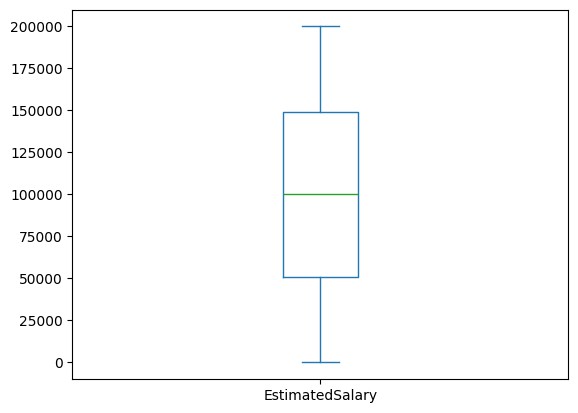

In [ ]:
df["EstimatedSalary"].plot(kind="box")

In [ ]:
df.head(3)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


In [ ]:
(df["EstimatedSalary"] < 5000).value_counts()

,count
EstimatedSalary,
False,9736
True,264


In [ ]:
df =  df[df["EstimatedSalary"] > 5000]

In [ ]:
(df["EstimatedSalary"] > 5000).value_counts()

,count
EstimatedSalary,
True,9736


In [ ]:
df["EstimatedSalary"].value_counts()

,count
EstimatedSalary,
24924.92,2
16403.41,1
78854.57,1
189310.27,1
78088.17,1
...,...
121232.51,1
6382.46,1
158750.13,1


In [ ]:
df = df.drop(["RowNumber","CustomerId","Surname"],axis="columns")

In [ ]:
df.head(3)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


In [ ]:
df["Geography"].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df["Geography"] = le.fit_transform(df["Geography"])

In [ ]:
df.head(3)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,Female,42,2,0.00,1,1,1,101348.88,1
1,608,2,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,0,Female,42,8,159660.80,3,1,0,113931.57,1


In [ ]:
df["Gender"] = le.fit_transform(df["Gender"])

In [ ]:
df.head(3)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
x = df.drop("Exited",axis="columns")
y = df["Exited"]
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1,stratify=y)


In [ ]:
X_train.shape,X_test.shape

((7788, 10), (1948, 10))

In [ ]:
reg = LogisticRegression(max_iter=10000)
reg.fit(X_train,y_train)

LogisticRegression(max_iter=10000)

In [ ]:
reg.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
reg.score(X_test,y_test)

0.8028747433264887

In [ ]:
y_pred = reg.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      1549
           1       0.56      0.17      0.26       399

    accuracy                           0.80      1948
   macro avg       0.69      0.57      0.58      1948
weighted avg       0.77      0.80      0.76      1948



In [ ]:
 df.head(3)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1


In [ ]:
df["Exited"].value_counts()

,count
Exited,
0,7741
1,1995


# ****Undersampling****

In [ ]:
df1_0 = df[df["Exited"]==0].sample(1995)

In [ ]:
df1_1 = df[df["Exited"] == 1]

In [ ]:
new_df0 = pd.concat([df1_0,df1_1],axis=0)

In [ ]:
new_df0.shape

(3990, 11)

In [ ]:
x1 = new_df0.drop("Exited",axis="columns")
y1 = new_df0["Exited"]
X1_train,X1_test,y1_train,y1_test = train_test_split(x1,y1,test_size=0.2,random_state=1,stratify=y1)

In [ ]:
reg1 = LogisticRegression(max_iter=10000)
reg1.fit(X1_train,y1_train)

LogisticRegression(max_iter=10000)

In [ ]:
y1_pred = reg1.predict(X1_test)
print(classification_report(y1_test,y1_pred))

              precision    recall  f1-score   support

           0       0.70      0.71      0.71       399
           1       0.71      0.69      0.70       399

    accuracy                           0.70       798
   macro avg       0.70      0.70      0.70       798
weighted avg       0.70      0.70      0.70       798



In [ ]:
df.shape

(9736, 11)

In [ ]:
not_exited,exited = df["Exited"].value_counts()
not_exited,exited

(7741, 1995)

In [ ]:
df_class_1 = df[df["Exited"] == 1]
df_class_1.shape

(1995, 11)

In [ ]:
df_class_0 = df[df["Exited"] == 0]
df_class_0.shape

(7741, 11)

In [ ]:
df_class_1 = df_class_1.sample(not_exited,replace=True)
df_class_1.shape

(7741, 11)

In [ ]:
new_df1 = pd.concat([df_class_0,df_class_1],axis=0)
new_df1.shape

(15482, 11)

In [ ]:
print(new_df1["Exited"].value_counts())

Exited
0    7741
1    7741
Name: count, dtype: int64


In [ ]:
reg2 = LogisticRegression()
x2 = new_df1.drop("Exited",axis="columns")
y2 = new_df1["Exited"]
X2_train,X2_test,y2_train,y2_test = train_test_split(x2,y2,test_size=0.2,random_state=1,stratify=y2)
reg2 = LogisticRegression(max_iter=100000)
reg2.fit(X2_train,y2_train)

LogisticRegression(max_iter=100000)

In [ ]:
y2_pred = reg2.predict(X2_test)
print(classification_report(y2_test,y2_pred))

              precision    recall  f1-score   support

           0       0.71      0.70      0.70      1548
           1       0.70      0.71      0.71      1549

    accuracy                           0.71      3097
   macro avg       0.71      0.71      0.71      3097
weighted avg       0.71      0.71      0.71      3097



# SMOTE

In [ ]:

# !pip install -U scikit-learn==1.4.2 imbalanced-learn==0.12.2 --quiet
# import os
# os.kill(os.getpid(), 9)

In [ ]:
X3 = df.drop("Exited",axis='columns')
y3 = df["Exited"]
from imblearn.over_sampling import SMOTE


smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X3, y3)


y_sm.value_counts()

,count
Exited,
1,7741
0,7741


In [ ]:
from sklearn.model_selection import train_test_split
X3_train, X3_test, y3_train, y3_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)
y3_train.value_counts()

,count
Exited,
1,6193
0,6192


In [ ]:
reg3 = LogisticRegression(max_iter=100000)
reg3.fit(X3_train,y3_train)

LogisticRegression(max_iter=100000)

In [ ]:
y3_pred = reg3.predict(X3_test)
print(classification_report(y3_test,y3_pred))

              precision    recall  f1-score   support

           0       0.80      0.75      0.77      1549
           1       0.77      0.81      0.79      1548

    accuracy                           0.78      3097
   macro avg       0.78      0.78      0.78      3097
weighted avg       0.78      0.78      0.78      3097

